In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings ('ignore')
sns.set_style('darkgrid')

In [7]:
df = (pd.read_csv("https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Mall_Customers.csv")[['Annual Income (k$)','Spending Score (1-100)']])
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [11]:
df.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

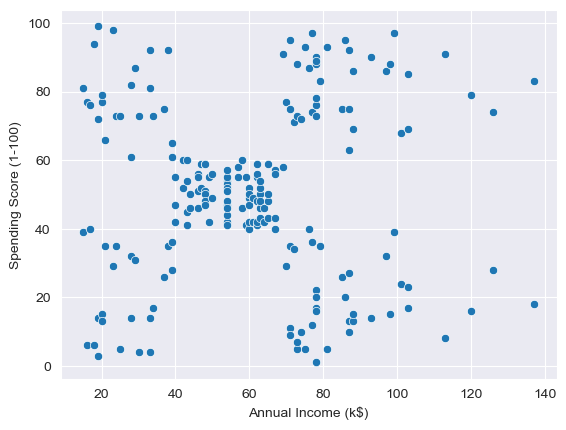

In [12]:
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [16]:
from sklearn.cluster import KMeans

In [17]:
km = KMeans()
y = km.fit_predict(x)

In [18]:
km.cluster_centers_

array([[ 2.06703817,  1.0958772 ],
       [-0.57434225,  0.05096574],
       [ 1.87564575, -1.09476801],
       [-1.35185213, -1.19089759],
       [-1.35921337,  1.19570407],
       [ 0.75632724,  1.27092084],
       [ 0.07722948, -0.11290604],
       [ 0.73205646, -1.42897101]])

In [19]:
x = pd.DataFrame(x)
x ['Cluster']=y
x

,0,1,Cluster
0,-1.738999,-0.434801,3
1,-1.738999,1.195704,4
2,-1.700830,-1.715913,3
3,-1.700830,1.040418,4
4,-1.662660,-0.395980,3
...,...,...,...
195,2.268791,1.118061,0
196,2.497807,-0.861839,2
197,2.497807,0.923953,0
198,2.917671,-1.250054,2


In [20]:
km.cluster_centers_

array([[ 2.06703817,  1.0958772 ],
       [-0.57434225,  0.05096574],
       [ 1.87564575, -1.09476801],
       [-1.35185213, -1.19089759],
       [-1.35921337,  1.19570407],
       [ 0.75632724,  1.27092084],
       [ 0.07722948, -0.11290604],
       [ 0.73205646, -1.42897101]])

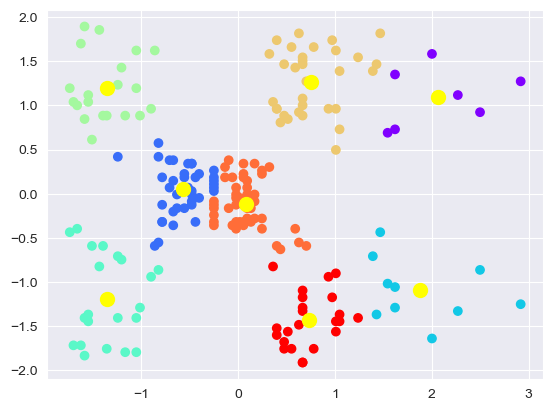

In [22]:
plt.scatter(x.iloc[:,0],x.iloc[:,1], c=x['Cluster'], cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c = 'yellow', s = 100)

In [23]:
x

,0,1,Cluster
0,-1.738999,-0.434801,3
1,-1.738999,1.195704,4
2,-1.700830,-1.715913,3
3,-1.700830,1.040418,4
4,-1.662660,-0.395980,3
...,...,...,...
195,2.268791,1.118061,0
196,2.497807,-0.861839,2
197,2.497807,0.923953,0
198,2.917671,-1.250054,2


In [25]:
x1 = x.iloc[:,:-1]
x1

,0,1
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


## Elbow Graph

In [27]:
wcss = []
for i in range(1,25):
    km = KMeans(n_clusters=i)
    km.fit_predict(x1)
    wcss.append(km.inertia_)

In [28]:
wcss

[400.0,
 269.08518232778215,
 157.70400815035947,
 108.92131661364357,
 65.56840815571682,
 55.06779591451968,
 44.86628627232253,
 37.199523875977086,
 32.36022982569204,
 29.076176851244274,
 26.58210834069413,
 23.762161708277517,
 21.426590245721613,
 20.09695199226273,
 17.87285673783863,
 16.02945751855216,
 15.111561180773988,
 14.158818894168837,
 13.05397016279534,
 12.243708716176789,
 11.290238309188707,
 10.404472597758879,
 10.10542408600552,
 9.685033326497994]

Text(0, 0.5, 'wcss')

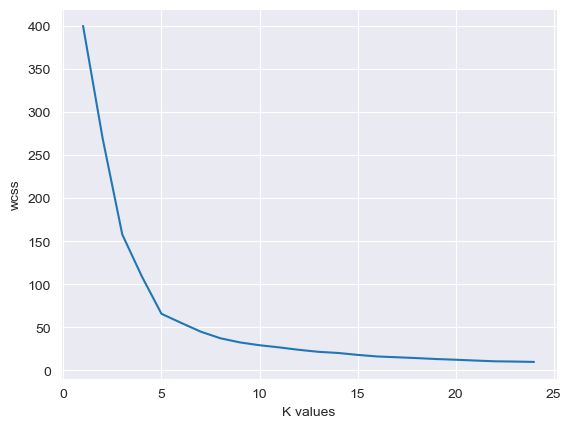

In [29]:
plt.plot(range(1,25),wcss)
plt.xlabel('K values')
plt.ylabel('wcss')

In [30]:
km = KMeans(n_clusters=5)
y = km.fit_predict(x1)
y

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3,
       2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 4, 1, 3, 1, 4, 1, 4, 1,
       3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [31]:
x1['Cluster'] = y

x1

,0,1,Cluster
0,-1.738999,-0.434801,2
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,2
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,2
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,4
197,2.497807,0.923953,1
198,2.917671,-1.250054,4


In [32]:
km.cluster_centers_

array([[-1.32954532,  1.13217788],
       [ 0.99158305,  1.23950275],
       [-1.30751869, -1.13696536],
       [-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907]])

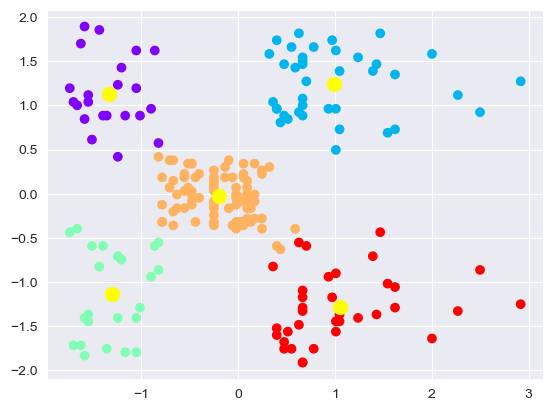

In [33]:
plt.scatter(x1.iloc[:,0], x.iloc[:,1], c = x1['Cluster'], cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow',s = 100)

In [34]:
df['Y'] = y
df

,Annual Income (k$),Spending Score (1-100),Y
0,15,39,2
1,15,81,0
2,16,6,2
3,16,77,0
4,17,40,2
...,...,...,...
195,120,79,1
196,126,28,4
197,126,74,1
198,137,18,4


In [35]:
df.groupby('Y').agg('mean')

,Annual Income (k$),Spending Score (1-100)
Y,,
0,25.727273,79.363636
1,86.538462,82.128205
2,26.304348,20.913043
3,55.296296,49.518519
4,88.200000,17.114286


In [36]:
df[df['Y'] == 1]

,Annual Income (k$),Spending Score (1-100),Y
123,69,91,1
125,70,77,1
127,71,95,1
129,71,75,1
131,71,75,1
133,72,71,1
135,73,88,1
137,73,73,1
139,74,72,1
141,75,93,1


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [38]:
df

,Annual Income (k$),Spending Score (1-100),Y
0,15,39,2
1,15,81,0
2,16,6,2
3,16,77,0
4,17,40,2
...,...,...,...
195,120,79,1
196,126,28,4
197,126,74,1
198,137,18,4


In [39]:
x = df.iloc[:,:-1]
y = df['Y']

In [40]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [41]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

In [42]:
from sklearn.metrics import classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         5
           2       1.00      0.75      0.86         8
           3       0.81      1.00      0.90        13
           4       1.00      1.00      1.00         9

    accuracy                           0.93        40
   macro avg       0.96      0.91      0.93        40
weighted avg       0.94      0.93      0.92        40

